# 기술통계 연습문제 (2)

Wage 데이터 셋은 경제 및 노동 시장에 관련된 정보를 담고 있는 데이터셋이다.

이 데이터셋은 미국에서 수집된 임금에 대한 정보를 포함하고 있다.


In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sb



In [2]:
# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'   # 윈도우 전용
#plt.rcParams['font.family'] = 'AppleGothic'    # 맥 전용
plt.rcParams["font.size"] = 10

# 그래프 크기 설정
plt.rcParams["figure.figsize"] = (12,8)

# 유니코드에서 음수 부호설정
plt.rcParams['axes.unicode_minus'] = False


In [3]:
df = pd.read_excel("https://data.hossam.kr/D02/wage.xlsx")
## 기술 통계량
df_desc = df.describe()
df

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
2996,2007,30,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
2997,2005,27,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408
2998,2005,27,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033


### 1. 데이터를 로드하여 명목형 변수를 1, 2 등으로 레이블링 하시오. 값의 종류는 데이터프레임으로부터 조회하여 확인하시오.

In [4]:
df.dtypes
## 명목형 변수로 처리할 칼럼 : maritl race education region jobclass health health_ins

year            int64
age             int64
maritl         object
race           object
education      object
region         object
jobclass       object
health         object
health_ins     object
logwage       float64
wage          float64
dtype: object

In [5]:
## 명목형 변수로 처리할 칼럼 : maritl race education region jobclass health health_ins

## maritl 칼럼 레이블링 

df['maritl'].unique()
maritl_value = df['maritl'].unique()
maritl_value
df[df['maritl']=="1. Never Married"] = df[df['maritl']=="1. Never Married"].replace("1. Never Married","0")
df[df['maritl']=="2. Married"] = df[df['maritl']=="2. Married"].replace("2. Married","1")
df[df['maritl']=="4. Divorced"] = df[df['maritl']=="4. Divorced"].replace("4. Divorced","2")
df[df['maritl']=="3. Widowed"] = df[df['maritl']=="3. Widowed"].replace("3. Widowed","3")
df[df['maritl']=="5. Separated"] = df[df['maritl']=="5. Separated"].replace("5. Separated","4")


## race 칼럼 레이블링 
df['race'].unique()
race_value = df['race'].unique()
df[df['race']=="1. White"] = df[df['race']=="1. White"].replace("1. White","0")
df[df['race']=="2. Black"] = df[df['race']=="2. Black"].replace("2. Black","1")
df[df['race']=="3. Asian"] = df[df['race']=="3. Asian"].replace("3. Asian","2")
df[df['race']=="4. Other"] = df[df['race']=="4. Other"].replace("4. Other","3")



## education 칼럼 레이블링 

df['education'].unique()
education_value = df['education'].unique()
df[df['education']=="1. < HS Grad"] = df[df['education']=="1. < HS Grad"].replace("1. < HS Grad","0")
df[df['education']=="2. HS Grad"] = df[df['education']=="2. HS Grad"].replace("2. HS Grad","1")
df[df['education']=="3. Some College"] = df[df['education']=="3. Some College"].replace("3. Some College","2")
df[df['education']=="4. College Grad"] = df[df['education']=="4. College Grad"].replace("4. College Grad","3")
df[df['education']=="5. Advanced Degree"] = df[df['education']=="5. Advanced Degree"].replace("5. Advanced Degree","4")

df['education'].unique()

## region 칼럼 레이블링
df['region'].value_counts()
region_value = df['region'].unique()

df['region'] = '0'
df['region'].value_counts()


## jobclass 칼럼 레이블링
df['jobclass'].unique()
jobclass_value = df['jobclass'].unique()

df[df['jobclass']=="1. Industrial"] = df[df['jobclass']=="1. Industrial"].replace("1. Industrial","0")
df[df['jobclass']=="2. Information"] = df[df['jobclass']=="2. Information"].replace("2. Information","1")
df['jobclass'].unique()

# health 칼럼 레이블링
df['health'].unique()
health_value = df['health'].unique()

df[df['health']=="1. <=Good"] = df[df['health']=="1. <=Good"].replace("1. <=Good","0")
df[df['health']=="2. >=Very Good"] = df[df['health']=="2. >=Very Good"].replace("2. >=Very Good","1")
df['health'].unique()

# health_ins 칼럼 레이블링
df['health_ins'].unique()
health_ins_value = df['health_ins'].unique()

df[df['health_ins']=="1. Yes"] = df[df['health_ins']=="1. Yes"].replace("1. Yes","0")
df[df['health_ins']=="2. No"] = df[df['health_ins']=="2. No"].replace("2. No","1")
df['health_ins'].unique()



array(['1', '0'], dtype=object)

### 2.레이블링 된 명목형 변수를 category 타입으로 변경하시오.

In [6]:
## 범주화로 처리할 칼럼 : maritl race education region jobclass health health_ins
df[['maritl', 'race', 'education', 'region', 'jobclass', 'health', 'health_ins']]=df[['maritl', 'race', 'education', 'region', 'jobclass', 'health', 'health_ins']].astype("category")
df.dtypes

year             int64
age              int64
maritl        category
race          category
education     category
region        category
jobclass      category
health        category
health_ins    category
logwage        float64
wage           float64
dtype: object

### 3.수치형 변수에 대한 요약 통계를 확인하고 설명하시오 (상자그림 제외)

In [7]:
df.dtypes
## 수치형 변수 age,logwage,wage

df.describe().iloc[:,1:]


,age,logwage,wage
count,3000.000000,3000.000000,3000.000000
mean,42.414667,4.653905,111.703608
std,11.542406,0.351753,41.728595
min,18.000000,3.000000,20.085537
25%,33.750000,4.447158,85.383940
50%,42.000000,4.653213,104.921507
75%,51.000000,4.857332,128.680488
max,80.000000,5.763128,318.342430


### 4. 명목형 변수에 대한 기술 통계를 수행하고 설명하시오

In [52]:
## 빈도수 확인 
## maritl race education region jobclass health health_ins
print(maritl_value)
df["maritl"].value_counts()
## 기혼자들이 제일 많다.

['1. Never Married' '2. Married' '4. Divorced' '3. Widowed' '5. Separated']


maritl
1    2074
0     648
2     204
4      55
3      19
Name: count, dtype: int64

In [9]:
## race 칼럼 
print(race_value)
df['race'].value_counts()

## 백인들이 제일 많다

['1. White' '3. Asian' '4. Other' '2. Black']


race
0    2480
1     293
2     190
3      37
Name: count, dtype: int64

In [10]:
## education 칼럼 
print(education_value)
df['education'].value_counts()

## 고졸 가진 사람들이 많다. 

['1. < HS Grad' '4. College Grad' '3. Some College' '2. HS Grad'
 '5. Advanced Degree']


education
1    971
3    685
2    650
4    426
0    268
Name: count, dtype: int64

In [11]:

## region 칼럼 
print(region_value)
df['region'].value_counts()
# 모두 Middle Atlantic 지역 사람이다 

['2. Middle Atlantic']


region
0    3000
Name: count, dtype: int64

In [12]:

## jobclass 칼럼 
print(jobclass_value)
df['jobclass'].value_counts()

## Industrial 직군의 사람들이 조금 더 많다.


['1. Industrial' '2. Information']


jobclass
0    1544
1    1456
Name: count, dtype: int64

In [13]:

## health 칼럼 
print(health_value)
df['health'].value_counts()

## 건강이 좋거나 안좋은 사람이 더 많다.



['1. <=Good' '2. >=Very Good']


health
1    2142
0     858
Name: count, dtype: int64

In [14]:

## health_ins 칼럼 
print(health_ins_value)
df['health_ins'].value_counts()

## 건강보험 가힙한사람들이 더 많듬


['2. No' '1. Yes']


health_ins
0    2083
1     917
Name: count, dtype: int64

### 5. 결혼 여부에 따른 임금 수준을 비교하고자 한다. 결혼 여부에 따라 서브플롯을 구성하여 임금 수준을 히스토그램으로 시각화 하고 설명하시오.

In [16]:
print(maritl_value)


['1. Never Married' '2. Married' '4. Divorced' '3. Widowed' '5. Separated']


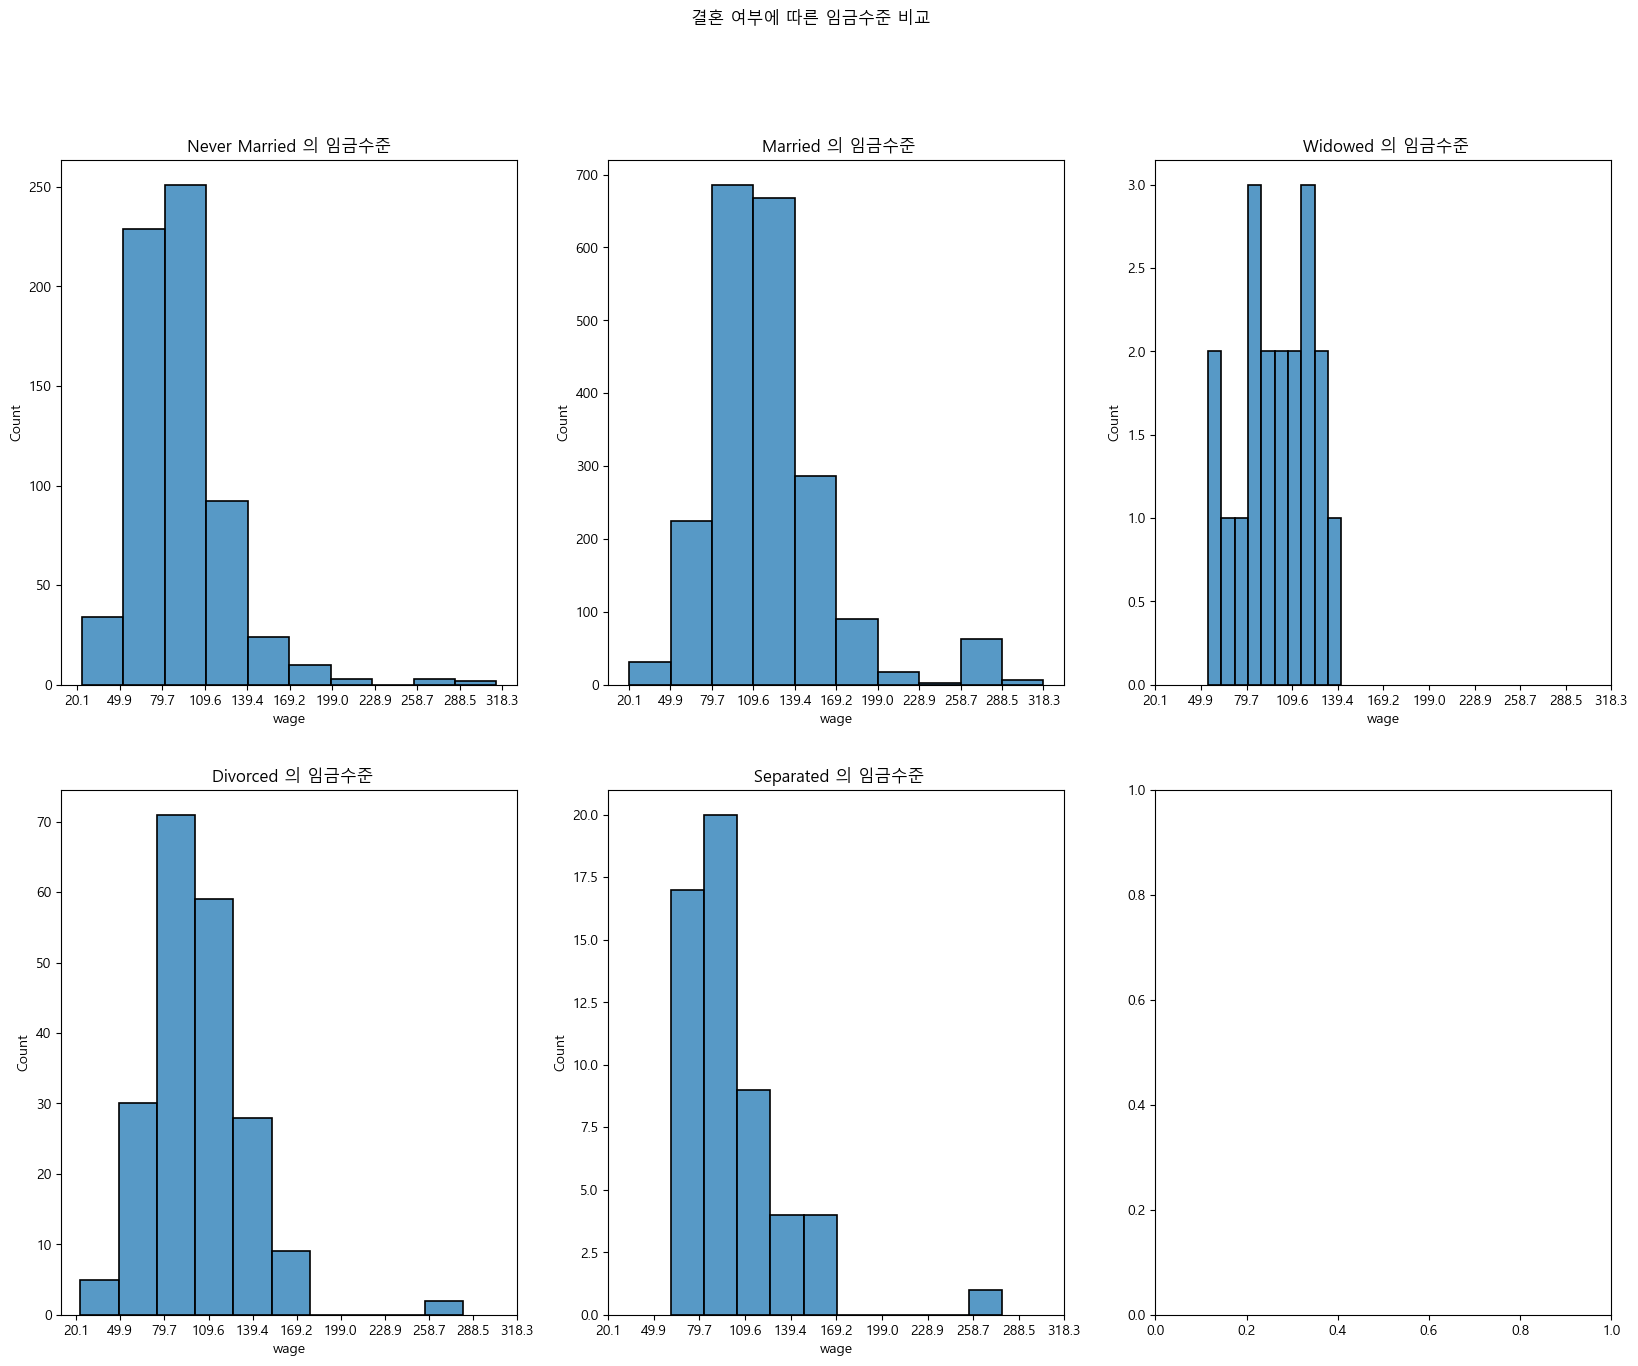

<Figure size 1200x800 with 0 Axes>

In [55]:
hist , bins = np.histogram(df['wage'],bins=10)
fig, ax = plt.subplots(2,3,figsize=(20,15))
plt.figure()
## 전체 제목
fig.suptitle("결혼 여부에 따른 임금수준 비교")

## Never Married 인사람
sb.histplot(data=df[df['maritl']=='0']['wage'],bins=10,ax=ax[0][0],edgecolor='black',linewidth=1.2)
ax[0][0].set_title("Never Married 의 임금수준")
ax[0][0].set_xticks(np.round(bins,1),np.round(bins,1))
##  Married 인사람의 임금수준
sb.histplot(data=df[df['maritl']=='1']['wage'],bins=10,ax=ax[0][1],edgecolor='black',linewidth=1.2)
ax[0][1].set_title(" Married 의 임금수준")
ax[0][1].set_xticks(np.round(bins,1),np.round(bins,1))

##  Widowed 인사람
sb.histplot(data=df[df['maritl']=='3']['wage'],bins=10,ax=ax[0][2],edgecolor='black',linewidth=1.2)
ax[0][2].set_title(" Widowed 의 임금수준")
ax[0][2].set_xticks(np.round(bins,1),np.round(bins,1))
##  Divorced 인사람
sb.histplot(data=df[df['maritl']=='2']['wage'],bins=10,ax=ax[1][0],edgecolor='black',linewidth=1.2)
ax[1][0].set_title(" Divorced 의 임금수준")
ax[1][0].set_xticks(np.round(bins,1),np.round(bins,1))

##  Separated 인사람
sb.histplot(data=df[df['maritl']=='4']['wage'],bins=10,ax=ax[1][1],edgecolor='black',linewidth=1.2)
ax[1][1].set_title(" Separated 의 임금수준")
ax[1][1].set_xticks(np.round(bins,1),np.round(bins,1))
plt.show()
plt.close()

1. 최고소득층에 위치하는 사람의 경우 대다수가 기혼자들이다.
2. 최저소득층에 위치하는 사람의 경우 대다수가 결혼을 해본적이 없는 사람들이다.
3. 결혼여부의 빈도수를 따져보면 기혼자의 빈도가 제일 높고 widowed 한 사람의 빈도수가 제일 적다.
4. 각 결혼여부에 상관없이 중하위소득층이 가장 많은 비율을 차지한다. 

### 6. 교육 수준에 따른 임금에 대한 히스토그램을 시각화 하고 설명하시오. 교육수준별로 그래프를 나누어 서브플롯으로 제시해야 합니다.

In [18]:
print(education_value)


['1. < HS Grad' '4. College Grad' '3. Some College' '2. HS Grad'
 '5. Advanced Degree']


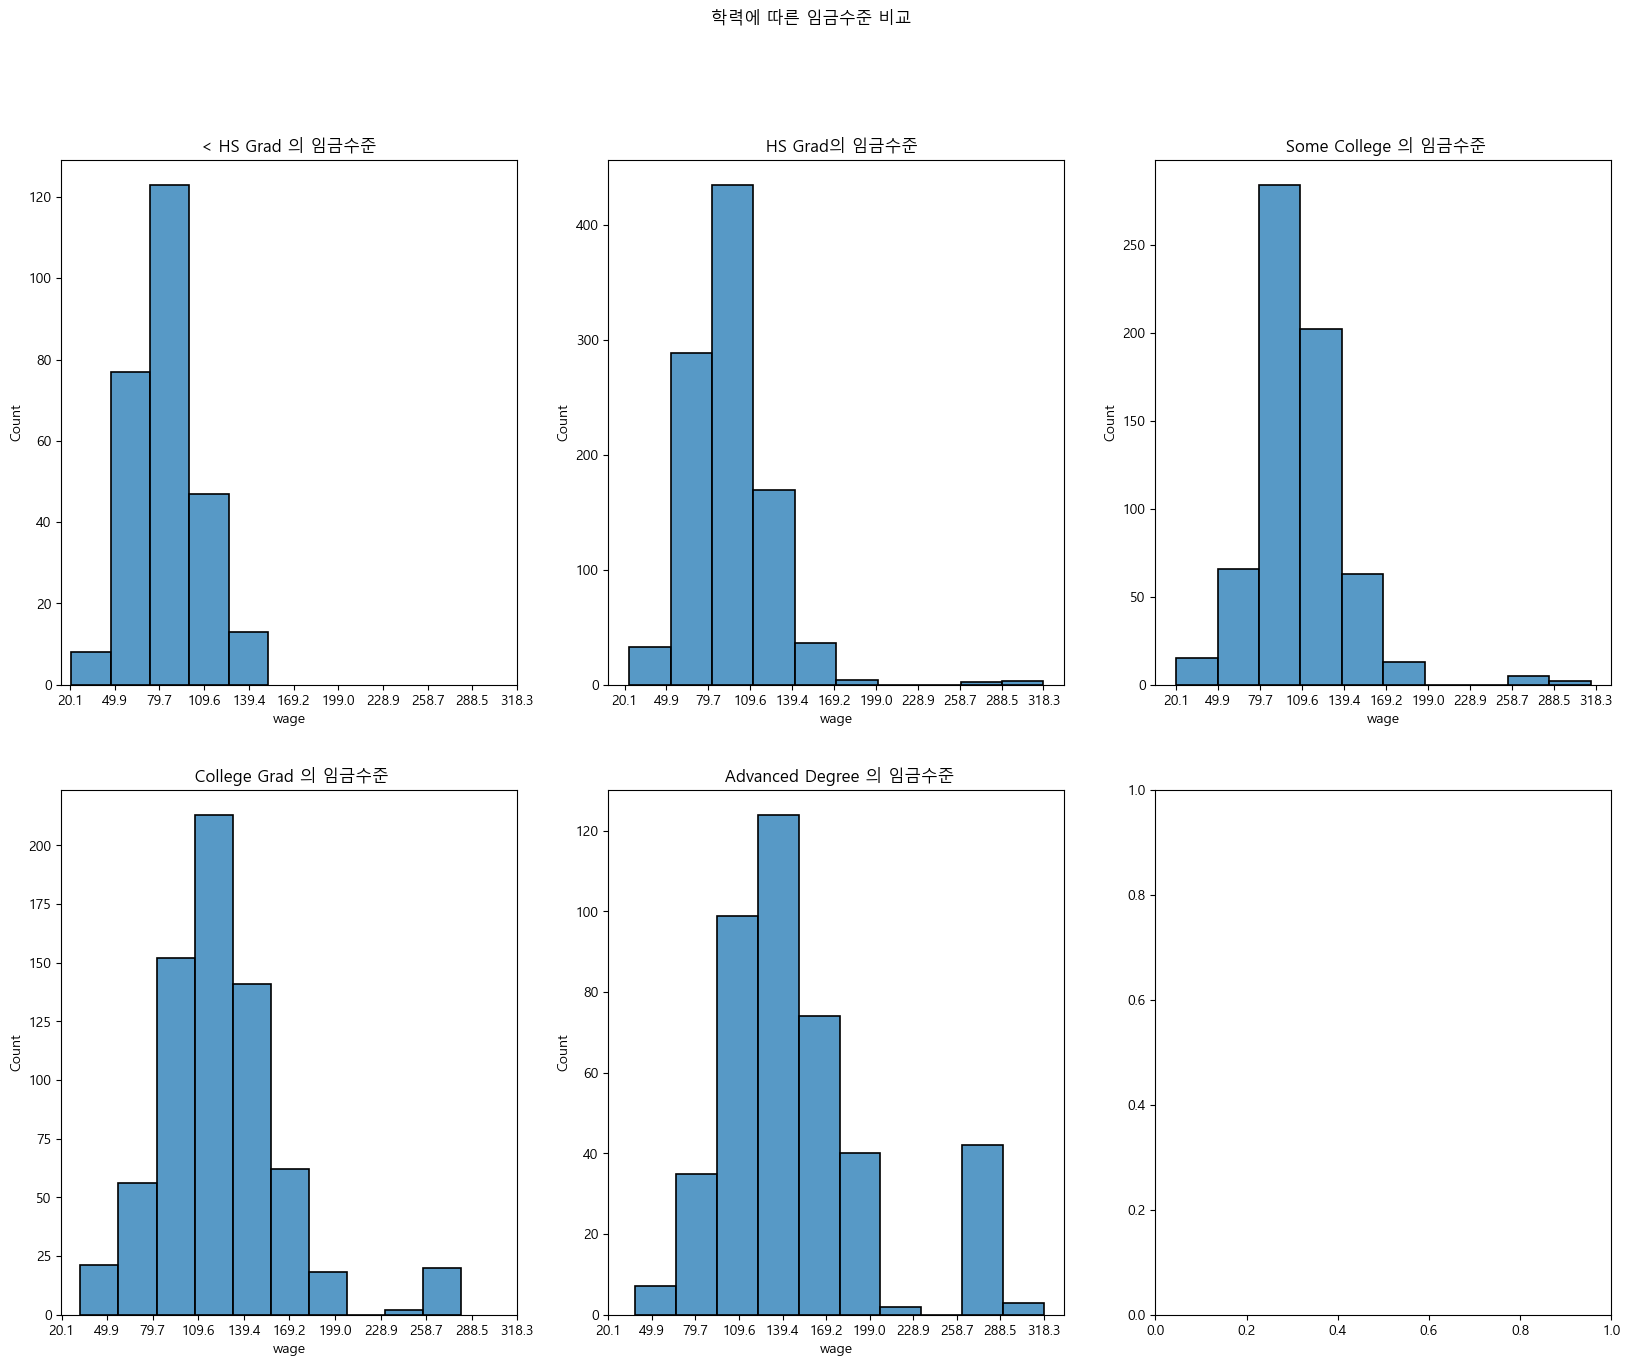

<Figure size 1200x800 with 0 Axes>

In [58]:
hist , bins = np.histogram(df['wage'],bins=10)
fig, ax = plt.subplots(2,3,figsize=(20,15))
plt.figure()
## 전체 제목
fig.suptitle("학력에 따른 임금수준 비교")

## < HS Grad 인사람
sb.histplot(data=df[df['education']=='0']['wage'],bins=5,ax=ax[0][0],edgecolor='black',linewidth=1.2)
ax[0][0].set_title("< HS Grad 의 임금수준")
ax[0][0].set_xticks(np.round(bins,1),np.round(bins,1))
##  Married 인사람의 임금수준
sb.histplot(data=df[df['education']=='1']['wage'],bins=10,ax=ax[0][1],edgecolor='black',linewidth=1.2)
ax[0][1].set_title("  HS Grad의 임금수준")
ax[0][1].set_xticks(np.round(bins,1),np.round(bins,1))

##  Widowed 인사람
sb.histplot(data=df[df['education']=='2']['wage'],bins=10,ax=ax[0][2],edgecolor='black',linewidth=1.2)
ax[0][2].set_title(" Some College 의 임금수준")
ax[0][2].set_xticks(np.round(bins,1),np.round(bins,1))
##  Divorced 인사람
sb.histplot(data=df[df['education']=='3']['wage'],bins=10,ax=ax[1][0],edgecolor='black',linewidth=1.2)
ax[1][0].set_title(" College Grad 의 임금수준")
ax[1][0].set_xticks(np.round(bins,1),np.round(bins,1))

##  Separated 인사람
sb.histplot(data=df[df['education']=='4']['wage'],bins=10,ax=ax[1][1],edgecolor='black',linewidth=1.2)
ax[1][1].set_title(" Advanced Degree 의 임금수준")
ax[1][1].set_xticks(np.round(bins,1),np.round(bins,1))
plt.show()
plt.close()

1. 최고소득층에는 Advanced Degree의 학력을 가진사람이 가장 많다 
2. 학력에 상관없이 중하위층의 소득을 가진 계층의 빈도수가 가장 높다
3. 전체 데이터에서 HS Grad의 학력을 가지고, 중하위소득층에 위치한 사람의 수가 가장 많다.

### 7. 직군별 건강상태를 확인하고자 한다. 적절한 형태로 데이터를 재배치하고 설명하시오.

In [65]:
## 결측치 확인

print('직군 칼럼의 결측치 수 :',df['jobclass'].isnull().sum())
print(" 건강상태 칼럼의 결측치 수 :",df['health'].isnull().sum())
print("")
print("-"*50)
print("")
## 직군별 데이터 재배치
print("직군의 값 확인 ", jobclass_value)
## Industrial 직군의 건강상태 확인
df_Industrial = df[df['jobclass']=='0'][['jobclass','health']]
## Industrial 건강상태 비율 확인
print("Industrial 직군의 건강상태 ")
print(df_Industrial.value_counts())
print("Industrial 직군의 건강상태 비율 : ", df_Industrial.value_counts()/len(df_Industrial))
# df_Industria
print("")
print("-"*50)
print("")
## Industrial 직군의 건강상태 확인
df_Information = df[df['jobclass']=='1'][['jobclass','health']]
print("Information 직군의 건강상태 ")
print(df_Information.value_counts())

print("Information 직군의 건강상태 비율 : ", df_Information.value_counts()/len(df_Information))


직군 칼럼의 결측치 수 : 0
 건강상태 칼럼의 결측치 수 : 0

--------------------------------------------------

직군의 값 확인  ['1. Industrial' '2. Information']
Industrial 직군의 건강상태 
jobclass  health
0         1         1057
          0          487
Name: count, dtype: int64
Industrial 직군의 건강상태 비율 :  jobclass  health
0         1         0.684585
          0         0.315415
Name: count, dtype: float64

--------------------------------------------------

Information 직군의 건강상태 
jobclass  health
1         1         1085
          0          371
Name: count, dtype: int64
Information 직군의 건강상태 비율 :  jobclass  health
1         1         0.745192
          0         0.254808
Name: count, dtype: float64


1. Industrial 직군보다 Information 직군에서 건강상태가 좋은 사람의 비율과 빈도가 더 높다


### 8. 교육 수준을 인종 비율에 따라 설명하고자 한다. 적절한 시각화 자료를 제시하고 설명하시오.

In [21]:
print(education_value)
print(race_value)

['1. < HS Grad' '4. College Grad' '3. Some College' '2. HS Grad'
 '5. Advanced Degree']
['1. White' '3. Asian' '4. Other' '2. Black']


In [48]:
plt.figure()

topic = education_value
new_df = df[['race','education']]
print(education_value)
## 백인의 교육수준
white = df[df['race']=='0'][['race','education']]

white_hslow = white[white['education']=='0']
white_hs = white[white['education']=='1']
white_somecoll = white[white['education']=='2']
white_collgrad = white[white['education']=='3']
white_advan = white[white['education']=='4']

## 흑인의 교육수준
black = df[df['race']=='1'][['race','education']]

black_hslow = black[black['education']=='0']
black_hs = black[black['education']=='1']
black_somecoll = black[black['education']=='2']
black_collgrad = black[black['education']=='3']
black_advan = black[black['education']=='4']

## 아시아인의 교육수준

asian = df[df['race']=='2'][['race','education']]

asian_hslow = asian[asian['education']=='0']
asian_hs = asian[asian['education']=='1']
asian_somecoll = asian[asian['education']=='2']
asian_collgrad = asian[asian['education']=='3']
asian_advan = asian[asian['education']=='4']

## 기타 인종의 교육수준
other = df[df['race']=='3'][['race','education']]

other_hslow = other[other['education']=='0']
other_hs = other[other['education']=='1']
other_somecoll = other[other['education']=='2']
other_collgrad = other[other['education']=='3']
other_advan = other[other['education']=='4']

x=len(education_value)





['1. < HS Grad' '4. College Grad' '3. Some College' '2. HS Grad'
 '5. Advanced Degree']


<Figure size 1200x800 with 0 Axes>

In [53]:
list(education_value)

['1. < HS Grad',
 '4. College Grad',
 '3. Some College',
 '2. HS Grad',
 '5. Advanced Degree']

<BarContainer object of 1 artists>

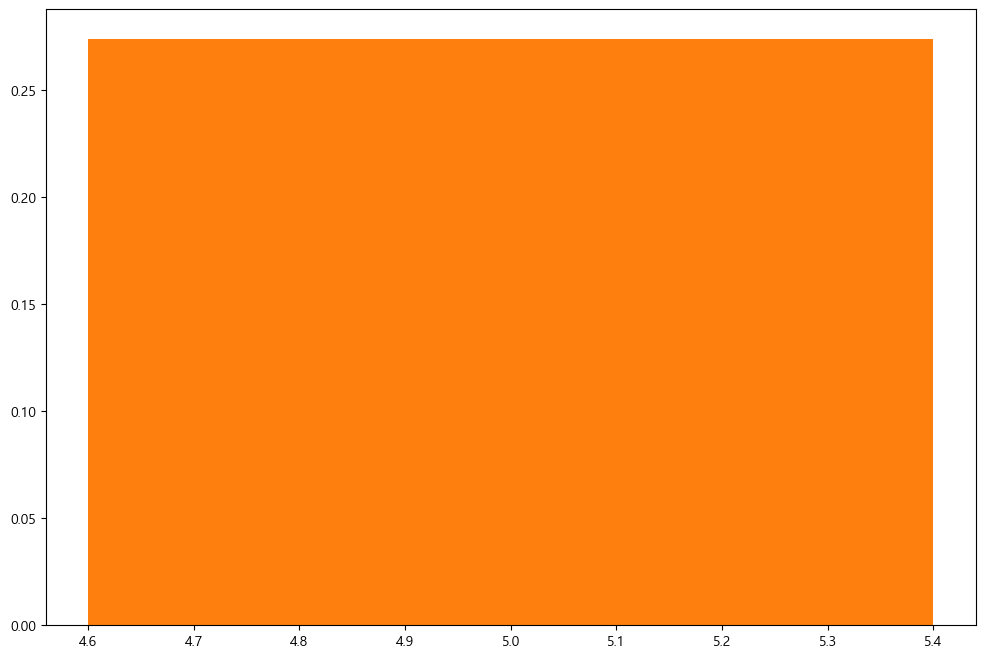

In [50]:
plt.figure()
plt.bar(x,len(white_hslow)/len(new_df))
plt.bar(x,len(white_hs)/len(new_df))